In [2]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install skimpy


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Import Libraries


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim


# Get data


In [4]:
df_salary = pd.read_csv("../datasets/salary.csv")

# Clean Data


In [5]:
skim(df_salary)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2639   │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 13     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name         ┃ NA  ┃ NA %  ┃ mean   ┃ sd     ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ AGE                 │   3 │  0.11 │  24.76 │  3.908 │     21 │     22 │     24 │     25 │      45 │  ▇▃▁   │  │
│ │ SALARY              │   0 │     0 │  58140 │  36880 │  40000 │  43420 │  46780 │  51400 │  388100 │   ▇    │  │
│ │ LEAVES USED         │   3 │  0.11 │   22.5 │  4.604 │     15 │     19 │     22 │     26 │      30 │ ▇▅▇▅▇▇ │  │
│ │ LEAVES REMAINING    │   2 │  0.08 │  7.503 │  4.603 │      0 │      4 │      8 │     11 │      15 │ ▇▅▇▅▇▇ │  │
│ │ RATINGS             │   2 │  0.08 │  3.486 │  1.115 │      2 │      2 │      3 │      4 │       5 │ ▇ ▇ ▇▇ │  │
│ │ PAST EXP            │   0 │     0 │  1.567 │  2.728 │      0 │      0 │      1 │      2 │      23 │   ▇▁   │  │
│ └─────────────────────┴─────┴───────┴────────┴────────┴────────┴────────┴────────┴────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA     ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ FIRST NAME                 │      0 │          0 │                            1 │                     2639 │  │
│ │ LAST NAME                  │      2 │       0.08 │                            1 │                     2637 │  │
│ │ SEX                        │      0 │          0 │                            1 │                     2639 │  │
│ │ DOJ                        │      1 │       0.04 │                            1 │                     2638 │  │
│ │ CURRENT DATE               │      0 │          0 │                            1 │                     2639 │  │
│ │ DESIGNATION                │      0 │          0 │                          1.2 │                     3057 │  │
│ │ UNIT                       │      0 │          0 │                            1 │                     2639 │  │
│ └────────────────────────────┴────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [6]:
df_salary.isnull().sum()
df_salary.dropna(inplace=True)

In [7]:
df_salary.isnull().sum()

FIRST NAME          0
LAST NAME           0
SEX                 0
DOJ                 0
CURRENT DATE        0
DESIGNATION         0
AGE                 0
SALARY              0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
dtype: int64

In [8]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2631 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2631 non-null   object 
 1   LAST NAME         2631 non-null   object 
 2   SEX               2631 non-null   object 
 3   DOJ               2631 non-null   object 
 4   CURRENT DATE      2631 non-null   object 
 5   DESIGNATION       2631 non-null   object 
 6   AGE               2631 non-null   float64
 7   SALARY            2631 non-null   int64  
 8   UNIT              2631 non-null   object 
 9   LEAVES USED       2631 non-null   float64
 10  LEAVES REMAINING  2631 non-null   float64
 11  RATINGS           2631 non-null   float64
 12  PAST EXP          2631 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 287.8+ KB


In [9]:
np.random.seed(43)
df_salary.sample(10)

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
1131,DORIAN,ALBREKHT,M,06-10-2014,01-07-2016,Analyst,25.0,43794,IT,15.0,15.0,5.0,2
274,JODI,AMISTADI,F,8-13-2013,01-07-2016,Analyst,24.0,49110,IT,25.0,5.0,2.0,1
540,MARSHALL,ACKISON,M,04-04-2014,01-07-2016,Analyst,24.0,45776,Management,17.0,13.0,4.0,1
1977,ROSIE,AMILL,F,2-18-2013,01-07-2016,Analyst,24.0,49901,Web,24.0,6.0,4.0,0
2214,FIDEL,AHLE,M,07-04-2014,01-07-2016,Analyst,23.0,42012,IT,30.0,0.0,5.0,0
2495,MERLE,APARICIO,F,07-09-2013,01-07-2016,Analyst,22.0,45147,Marketing,30.0,0.0,2.0,0
390,DOUG,ADALJA,M,07-12-2013,01-07-2016,Analyst,23.0,45152,Web,15.0,15.0,4.0,0
432,MARLON,AGBISIT,M,03-02-2014,01-07-2016,Analyst,21.0,40396,Marketing,28.0,2.0,2.0,0
54,ANGELITA,ARAGUS,F,08-04-2013,01-07-2016,Analyst,25.0,46436,IT,27.0,3.0,4.0,2
1588,GERALDINE,ALVARRACIN,F,9-30-2012,01-07-2016,Senior Manager,39.0,180778,Finance,23.0,7.0,4.0,11


In [10]:
df_salary.drop(columns=["FIRST NAME", "LAST NAME", "DOJ", "CURRENT DATE"], axis=1, inplace=True)
df_salary.columns = df_salary.columns.str.lower()
df_salary.columns

Index(['sex', 'designation', 'age', 'salary', 'unit', 'leaves used',
       'leaves remaining', 'ratings', 'past exp'],
      dtype='object')

In [11]:
# change tipy of columns
df_salary['age'] = df_salary['age'].astype('int64')

In [12]:
df_salary['unit'].value_counts()

unit
IT            460
Finance       445
Operations    437
Marketing     436
Web           428
Management    425
Name: count, dtype: int64

In [13]:
df_salary["designation"].value_counts()

designation
Analyst           1943
Senior Analyst     356
Associate          158
Manager             81
Senior Manager      61
Director            32
Name: count, dtype: int64

In [14]:
df_salary["sex"].value_counts()

sex
F    1340
M    1291
Name: count, dtype: int64

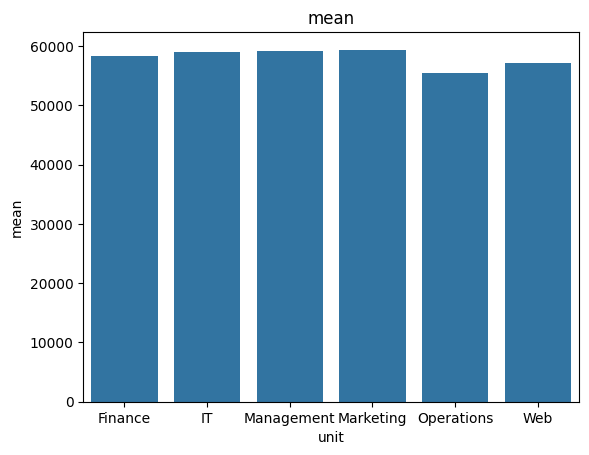

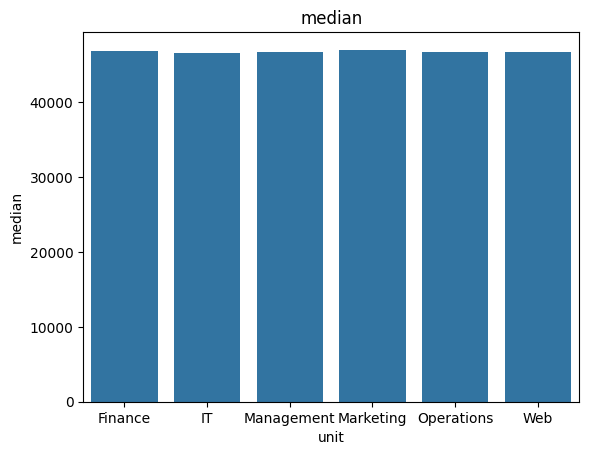

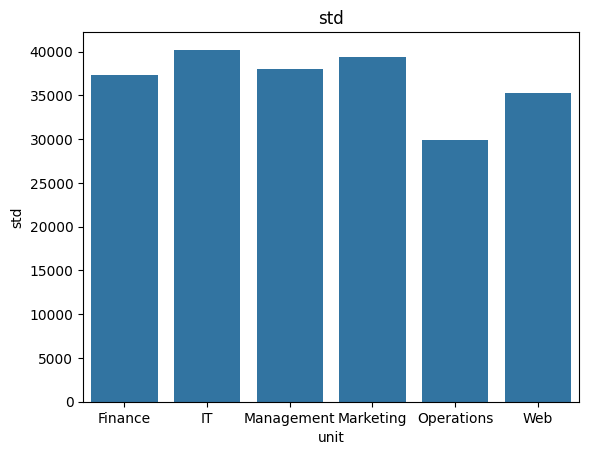

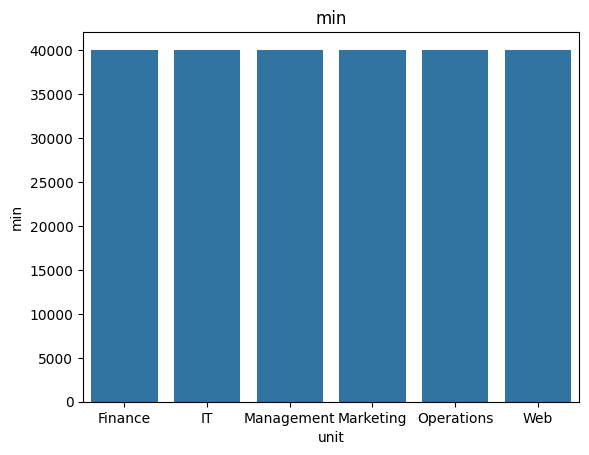

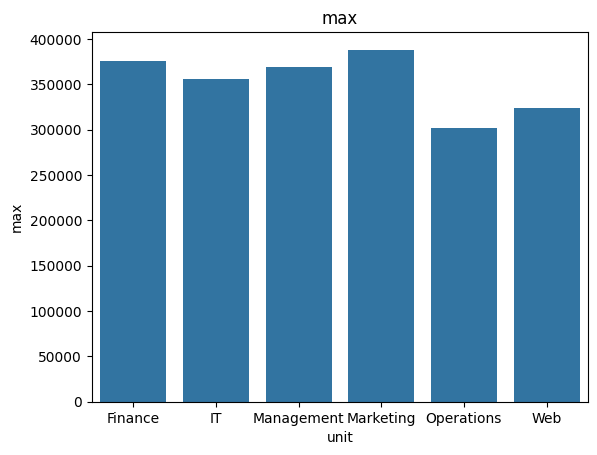

In [15]:
# calculate the mean salary for each unit
df_unit_by_salary = df_salary.groupby('unit')['salary'].agg(['mean', 'median', 'std', 'min', 'max'])

for col in df_unit_by_salary.columns:
    sns.barplot(x=df_unit_by_salary.index, y=df_unit_by_salary[col])
    plt.title(col)
    plt.show()

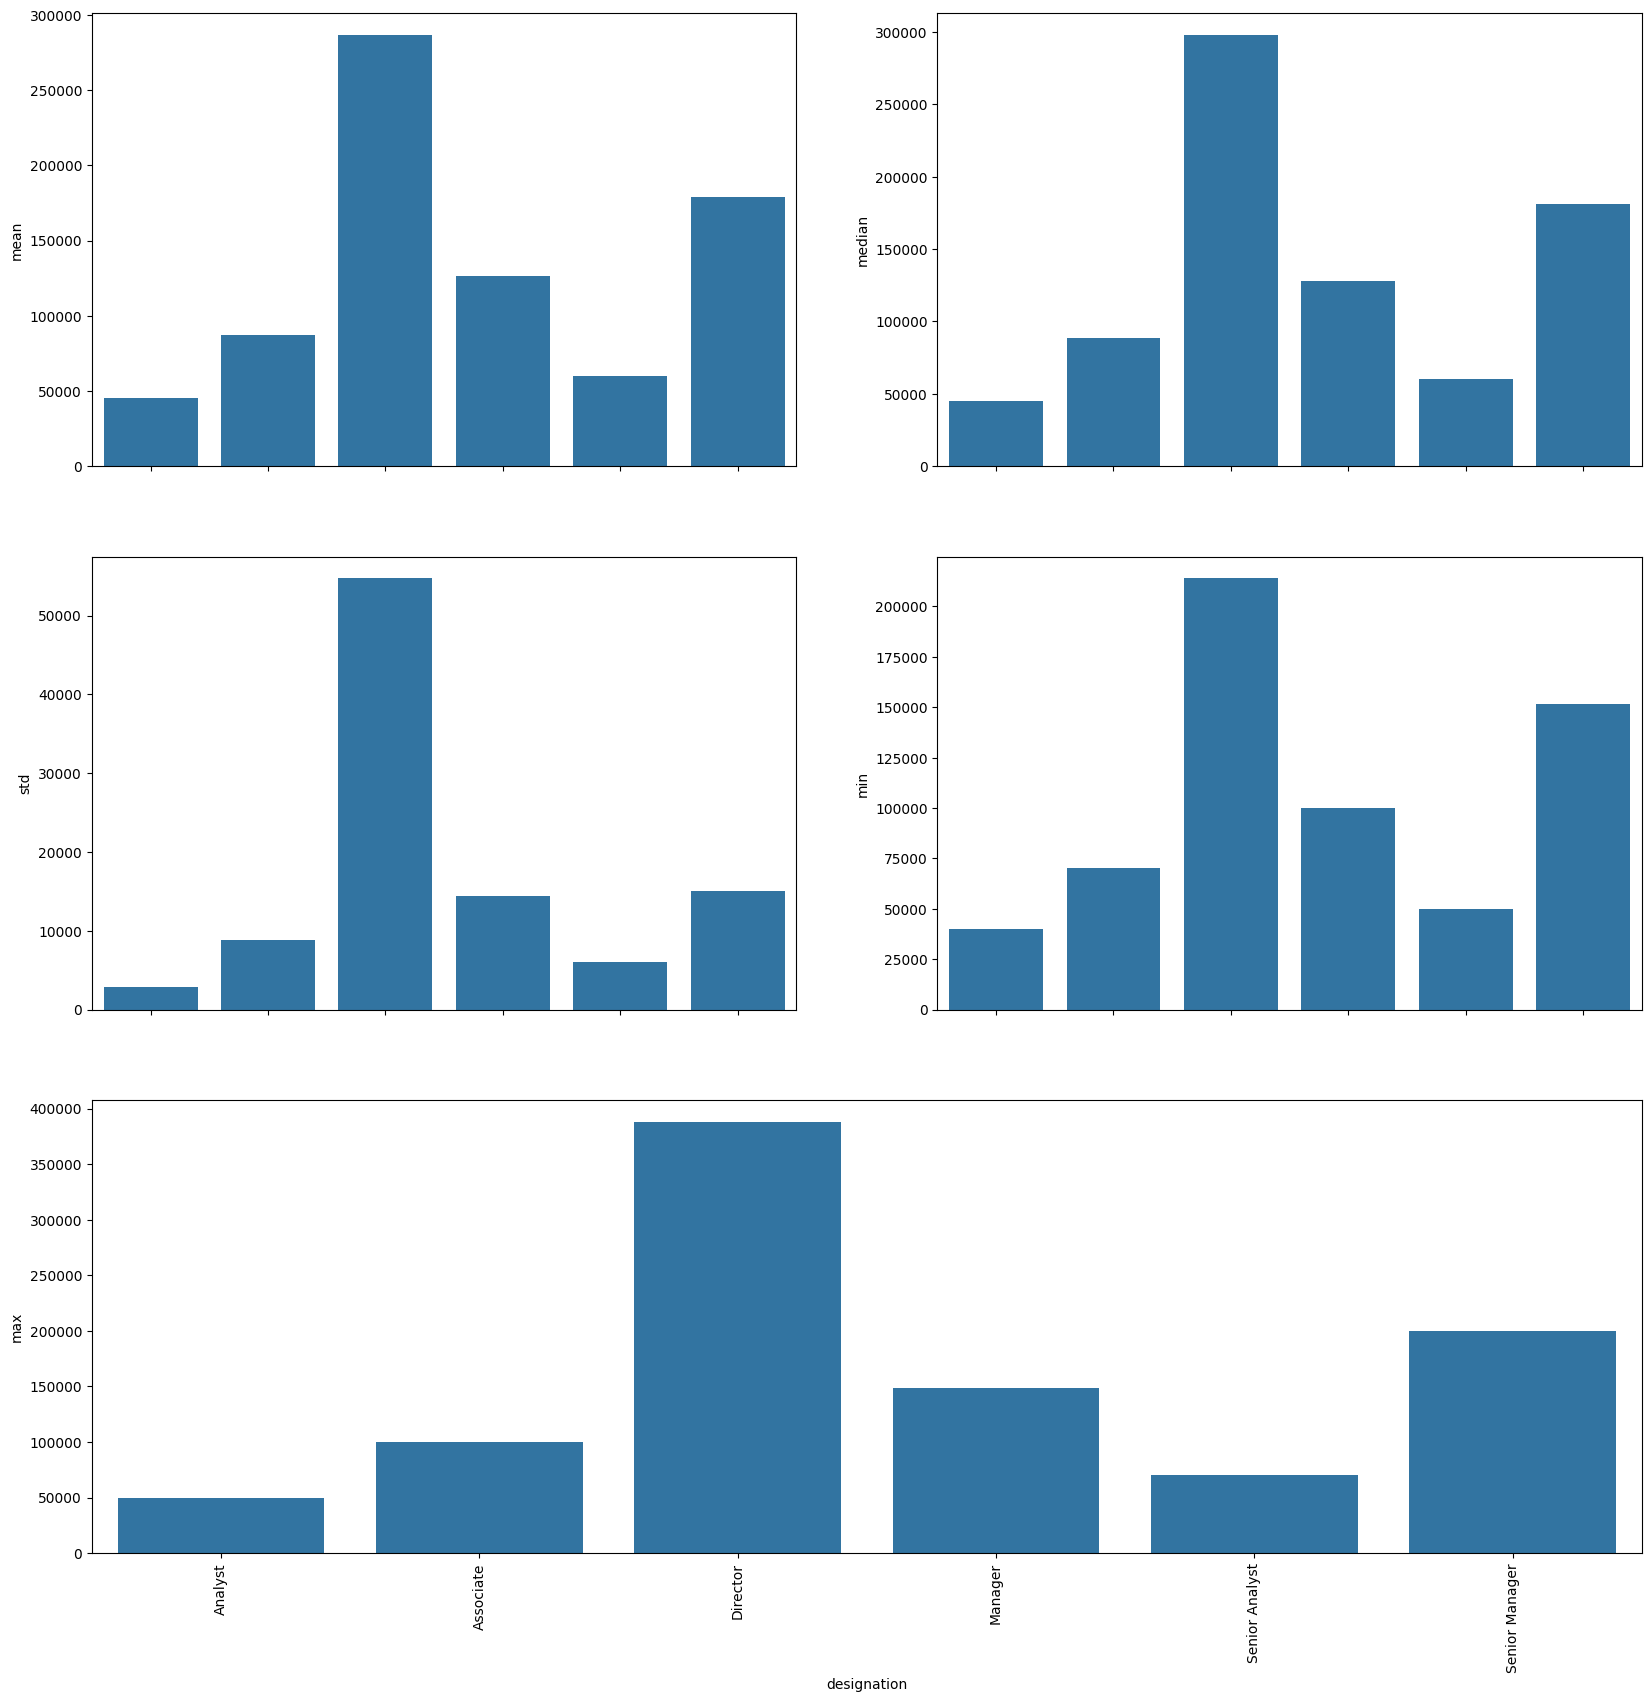

In [16]:


df_designation_by_salary = df_salary.groupby('designation')['salary'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()

# create a mosaic plot for the mean salary of each designation
fig, ax = plt.subplot_mosaic([['mean', 'median'], ['std', 'min'], ['max', 'max']], sharex=True, sharey=False, figsize=(20, 20))
sns.barplot(x='designation', y='mean', data=df_designation_by_salary, ax=ax['mean'])
sns.barplot(x='designation', y='median', data=df_designation_by_salary, ax=ax['median'])
sns.barplot(x='designation', y='std', data=df_designation_by_salary, ax=ax['std'])
sns.barplot(x='designation', y='min', data=df_designation_by_salary, ax=ax['min'])
sns.barplot(x='designation', y='max', data=df_designation_by_salary, ax=ax['max'])
plt.xticks(rotation=90)
plt.show()

In [17]:
df_salary_by_exp = df_salary['past exp'].value_counts().reset_index()

df_salary_by_exp

,past exp,count
0,0,1298
1,1,494
2,2,360
3,3,167
4,5,56
5,4,56
6,6,47
7,8,27
8,7,26
9,10,21


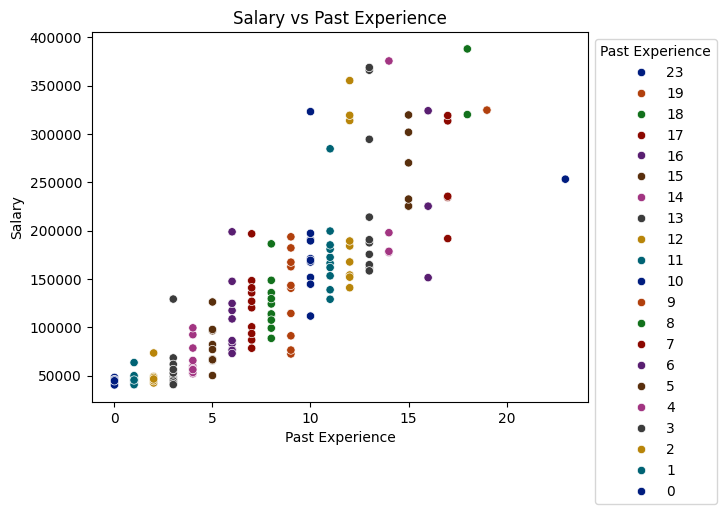

In [18]:
# get 10 examples of each past experience
df_exp_10 = df_salary.groupby('past exp').head(10)
df_exp_10 = df_exp_10[['past exp', 'salary']].sort_values('past exp', ascending=False).reset_index(drop=True)

ax= sns.scatterplot(x='past exp', y='salary', data=df_exp_10, palette='dark', hue='past exp', hue_order=df_exp_10['past exp'].unique())
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1, 1), title='Past Experience')
plt.title('Salary vs Past Experience')
plt.xlabel('Past Experience')
plt.ylabel('Salary')
plt.show()

In [19]:
import math

def mean(x):
    return round(np.mean(x), 2)

def_salary_mean_unit_designation = df_salary.pivot_table(index=["unit"], columns=["designation"], values=["salary"], aggfunc=[mean], fill_value=0, margins=True)
def_salary_mean_unit_designation


mean                                                 \
               salary                                                  
designation   Analyst Associate   Director    Manager Senior Analyst   
unit                                                                   
Finance      44915.23  85585.27  336155.00  125363.20       59840.43   
IT           44797.80  85535.50  270192.50  126045.08       60559.86   
Management   44975.03  87399.00  290730.20  126805.57       59744.10   
Marketing    45057.94  87330.93  305639.00  131864.33       58757.59   
Operations   45193.10  89876.68  269655.33  126092.80       60285.18   
Web          45205.95  87357.15  269443.71  121971.00       60527.35   
All          45022.57  87190.30  286971.19  126272.59       59901.35   

                                      
                                      
designation Senior Manager       All  
unit                                  
Finance          185681.38  58369.86  
IT               180896.86  59028.95  
Management       177612.08  59186.94  
Marketing        174689.86  59386.49  
Operations       179849.38  55506.11  
Web              176553.40  57188.06  
All              178960.20  58117.64

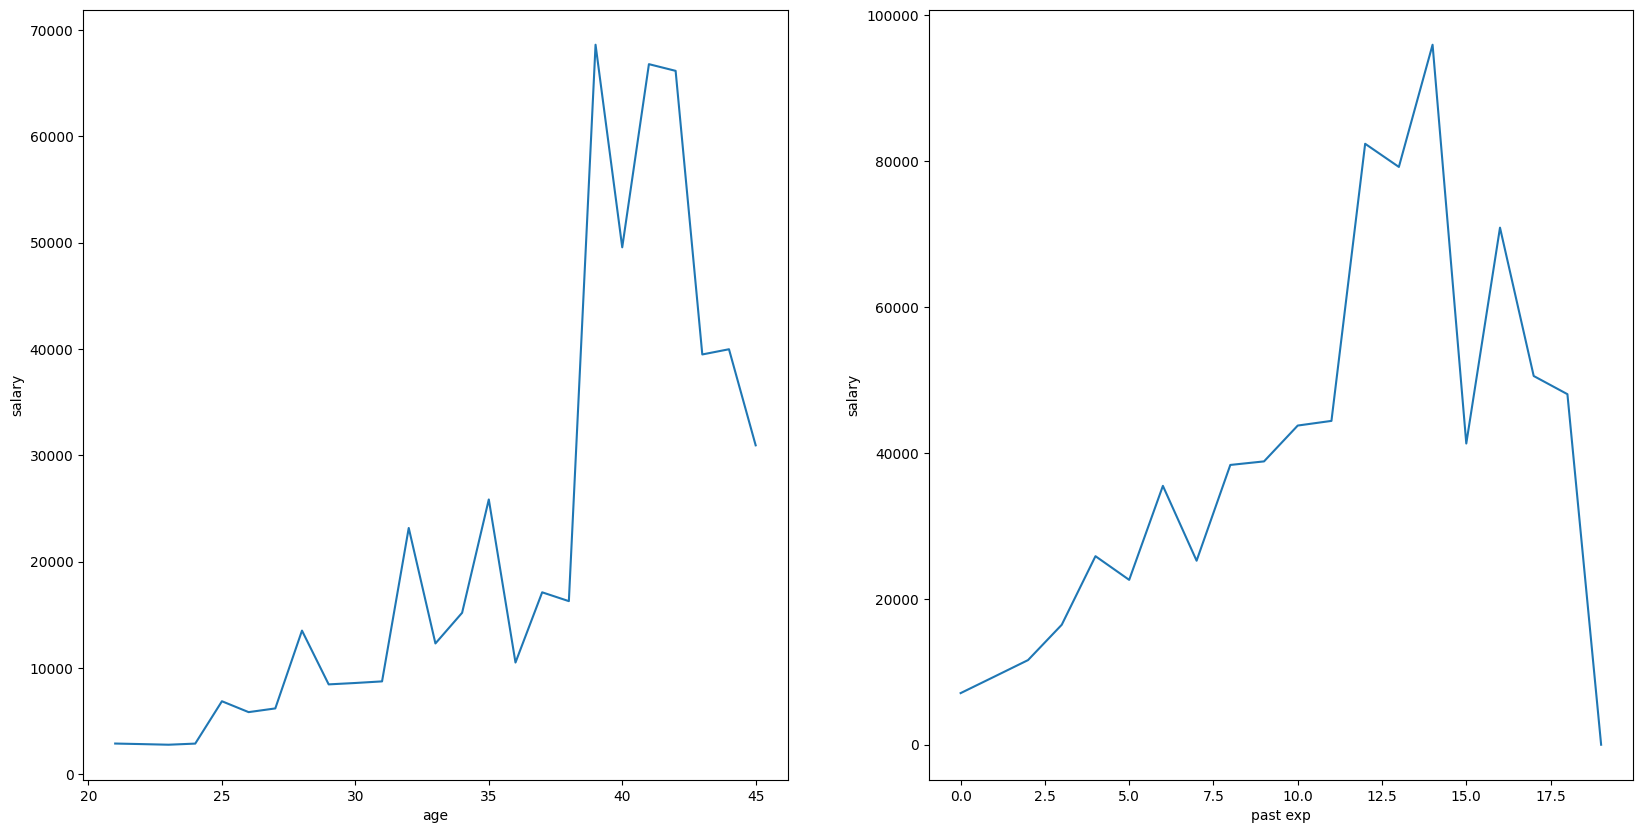

In [20]:
df_salary_by_age = df_salary.groupby('age')['salary'].std().reset_index()
df_salary_by_exp = df_salary.groupby('past exp')['salary'].std().reset_index()

fig, ax = plt.subplot_mosaic([['age', 'exp']], figsize=(20, 10))
sns.lineplot(x='age', y='salary', data=df_salary_by_age, ax=ax['age'])
sns.lineplot(x='past exp', y='salary', data=df_salary_by_exp, ax=ax['exp'])
plt.show()


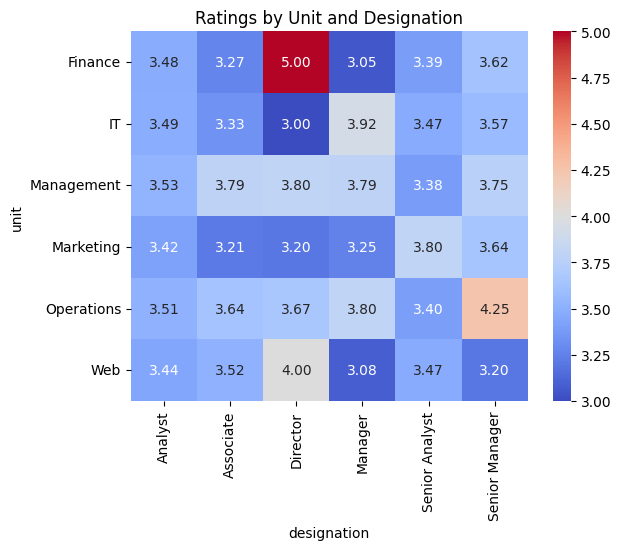

In [25]:
df_rating_by_unit = df_salary.pivot_table(index=["unit"], columns=["designation"], values="ratings")
df_rating_by_unit

# show the heatmap of the ratings by unit and designation
sns.heatmap(df_rating_by_unit, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Ratings by Unit and Designation')
plt.show()
